In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from numpy  import percentile
from numpy  import std
from numpy  import mean
import random
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [3]:
st_VLE= pd.read_csv('studentVle.csv')
courses = pd.read_csv('courses.csv')
students=pd.read_csv('studentInfo.csv')
registration = pd.read_csv('studentRegistration.csv')
results = pd.read_csv('studentAssessment.csv')
assessment = pd.read_csv('assessments.csv')
VLE= pd.read_csv('vle.csv')

In [4]:
courses 

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


## Создание общей таблицы

Необходимо создать таблицу

In [3]:
st_VLE.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Группируем данные с целью определения суммы кликов по всем ресурсам в активные дни для каждого студента в рамках 1-го курса

In [4]:
st_VLE_sum= st_VLE.groupby(['code_module','code_presentation', 'id_student', 'date']).sum().reset_index().drop(['id_site'], axis=1)
st_VLE_sum.head()

,code_module,code_presentation,id_student,date,sum_click
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3


Добавляем к таблице с результатами контрольх испытаний финльный результат прохождения курса. Убираем из рассматрения студентов, которые покинули обучение еще до его начала. А также тех, кто курс проходит повторно.

In [5]:
students_reg= students[(students.num_of_prev_attempts ==0)]. \
        merge(registration[(registration.date_unregistration >0) | (pd.isna(registration.date_unregistration) == True)], \
        how ='inner', on=['code_module','code_presentation', 'id_student'])

st_VLE_fr=st_VLE_sum.merge(students_reg, how ='inner', on=['code_module','code_presentation','id_student'])


total_table=st_VLE_fr.drop(st_VLE_fr.iloc[:, [6,8,10,11,14,15]], axis=1)
total_table.tail()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result
1627158,GGG,2014J,2684003,156,11,F,HE Qualification,35-55,N,Distinction
1627159,GGG,2014J,2684003,171,31,F,HE Qualification,35-55,N,Distinction
1627160,GGG,2014J,2684003,194,1,F,HE Qualification,35-55,N,Distinction
1627161,GGG,2014J,2684003,205,45,F,HE Qualification,35-55,N,Distinction
1627162,GGG,2014J,2684003,219,40,F,HE Qualification,35-55,N,Distinction


In [6]:
students_reg

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,NaN
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,-67.0,NaN
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,-29.0,NaN
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,-33.0,NaN
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,-179.0,NaN


Проверяем на наличие незаполненных строк

In [7]:
total_table.isnull().sum()

code_module          0
code_presentation    0
id_student           0
date                 0
sum_click            0
gender               0
highest_education    0
age_band             0
disability           0
final_result         0
dtype: int64

## Отбор курсов

In [8]:
assessment[(assessment.assessment_type != 'Exam')].groupby(['code_module', 'code_presentation']).sum(). drop(['id_assessment', 'date'], axis =1)

weight
code_module code_presentation        
AAA         2013J               100.0
            2014J               100.0
BBB         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
CCC         2014B               100.0
            2014J               100.0
DDD         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
EEE         2013J               100.0
            2014B               100.0
            2014J               100.0
FFF         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
GGG         2013J                 0.0
            2014B                 0.0
            2014J                 0.0

Исключаем из рассмотрения курс GGG, тк промежуточные испытания не имели веса в итоговой оценке за курс, что не сооттветствует требованиям к рассматриваемым нами данным.

In [9]:
st_VLE[(st_VLE['code_module']== 'GGG')].code_presentation.unique()

array(['2013J', '2014B', '2014J'], dtype=object)

In [10]:
st_VLE_GGG= st_VLE[(st_VLE['code_module'] == 'GGG') & (st_VLE['code_presentation'] == '2013J')]
clicks_GGG= st_VLE_GGG.groupby('date').agg({'sum_click': 'sum'}).reset_index()

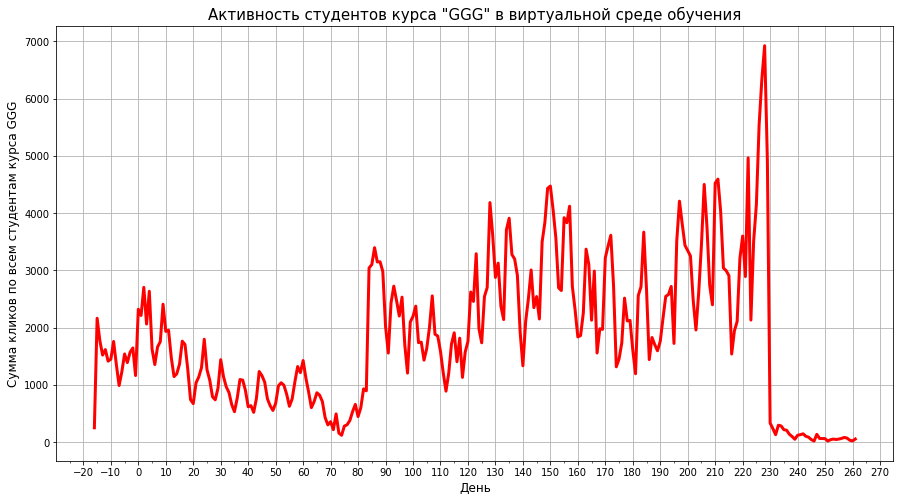

In [11]:
x_GGG = clicks_GGG['date']
y_GGG= clicks_GGG['sum_click']

fig, ax = plt.subplots()

ax.plot(x_GGG, y_GGG, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.xlabel('День', fontsize =12)
plt.ylabel('Сумма кликов по всем студентам курса GGG', fontsize =12)
plt.title('Активность студентов курса "GGG" в виртуальной среде обучения' , fontsize =15)
plt.grid()

fig.set_figwidth(15)
fig.set_figheight(8)

In [12]:
assessment_GGG= assessment[(assessment['code_module'] == 'GGG') & (assessment['code_presentation'] == '2014B')]
assessment_GGG

,code_module,code_presentation,id_assessment,assessment_type,date,weight
186,GGG,2014B,37428,CMA,222.0,0.0
187,GGG,2014B,37429,CMA,222.0,0.0
188,GGG,2014B,37430,CMA,222.0,0.0
189,GGG,2014B,37431,CMA,222.0,0.0
190,GGG,2014B,37432,CMA,222.0,0.0
191,GGG,2014B,37433,CMA,222.0,0.0
192,GGG,2014B,37425,TMA,61.0,0.0
193,GGG,2014B,37426,TMA,117.0,0.0
194,GGG,2014B,37427,TMA,166.0,0.0
195,GGG,2014B,37434,Exam,222.0,100.0


Для выбора курсов и конкретного потока в частности, необходимо убедиться, что поведение студентов в выбранных потоках не является аномальным. Для этого сравним активность стдентов разных потоков и курсов. Однако перед этим убедимся, что в потоках одного курса сохраняется одинаковое количество контрольных испытаний. Если количество испытаний в разных потоках одного курса будет различным, эти потоки исключаются из рассмотрения.

In [13]:
assessment[(assessment.code_module != 'GGG')&(assessment.assessment_type != 'Exam')].groupby(['code_module','code_presentation','assessment_type']).count().drop(['date','weight'], axis=1)


id_assessment
code_module code_presentation assessment_type               
AAA         2013J             TMA                          5
            2014J             TMA                          5
BBB         2013B             CMA                          5
                              TMA                          6
            2013J             CMA                          5
                              TMA                          6
            2014B             CMA                          5
                              TMA                          6
            2014J             TMA                          5
CCC         2014B             CMA                          4
                              TMA                          4
            2014J             CMA                          4
                              TMA                          4
DDD         2013B             CMA                          7
                              TMA                          6
            2013J             TMA                          6
            2014B             TMA                          6
            2014J             TMA                          6
EEE         2013J             TMA                          4
            2014B             TMA                          4
            2014J             TMA                          4
FFF         2013B             CMA                          7
                              TMA                          5
            2013J             CMA                          7
                              TMA                          5
            2014B             CMA                          7
                              TMA                          5
            2014J             CMA                          7
                              TMA                          5

Из таблицы видно, что в рамках курса ВВВ у потока 2014J изменилось количество испытаний: остались только 5 испытаний, оцениваемых преподавателем (ТМА), хотя у остальных потоков их было 6, а также было 5 испытаний, оцениваемых компьютером (СМА). \
Кроме того, в потоке 2013В в рамках курса DDD было 7 СМА и 6 ТМА, впоследующих же потоках осталось только 6 ТМА. Поэтому поток 2013В исключаем из рассмотрения

In [14]:
#исключаем неподходящие курсы из рассмотрения
activity=total_table[(total_table.code_module != 'GGG')&\
                    ((total_table.code_module != 'DDD')| (total_table.code_presentation != '2013B'))&\
                    ((total_table.code_module != 'BBB')| (total_table.code_presentation != '2014J'))]

activity_graph=activity.iloc[:,[0,1,3,4]].groupby(['code_module','code_presentation','date']).sum().reset_index()

In [15]:
"""Cоздаем таблицу, на основе которой будем рисовать график. 
В таблице отображаем сумму кликов в системе VLE по всем студентам каждого потока"""

activity_graph=activity.iloc[:,[0,1,3,4]].groupby(['code_module','code_presentation','date']).sum().reset_index()

In [16]:
"""Добавляем столбец %, в котором отображается информация о том, 
какой % кликов был сделан в конкретный день из всех кликов на курсе за все время"""

activity_graph_fnl=activity_graph.merge(activity_graph.groupby(['code_module','code_presentation']).\
                                        sum().reset_index().drop('date', axis=1), how ='left', \
                                        on=['code_module','code_presentation'])
activity_graph_fnl['%']=activity_graph_fnl['sum_click_x']/activity_graph_fnl['sum_click_y']*100
activity_graph_fnl=activity_graph_fnl.drop('sum_click_y',axis =1)
activity_graph_fnl.head()

,code_module,code_presentation,date,sum_click_x,%
0,AAA,2013J,-10,11943,1.843038
1,AAA,2013J,-9,5629,0.868665
2,AAA,2013J,-8,3481,0.537186
3,AAA,2013J,-7,3609,0.556939
4,AAA,2013J,-6,4140,0.638883


In [17]:
table_activity = pd.pivot_table(activity_graph_fnl, values='%', index=['date'], \
                                columns=['code_module','code_presentation'],  aggfunc=np.sum, fill_value=0)

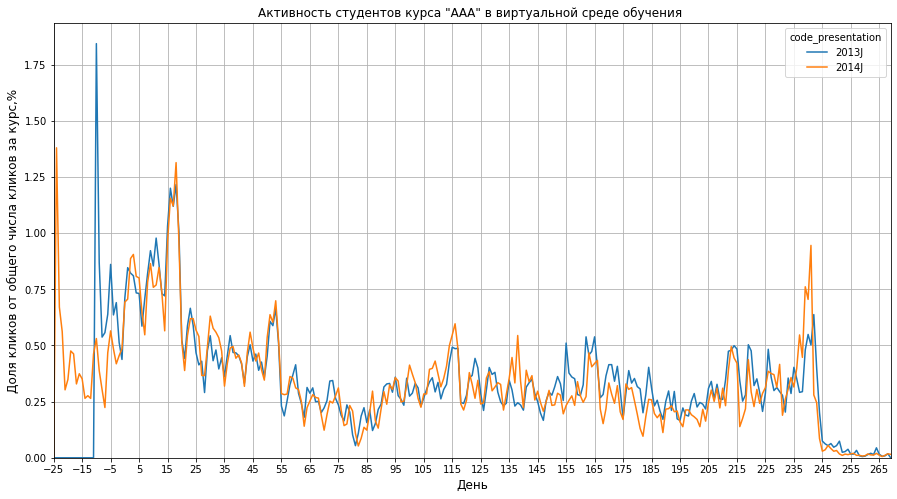

In [18]:
table_activity['AAA'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс,%', fontsize =12)
plt.title('Активность студентов курса "AAA" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


In [19]:
assessment[(assessment.code_module == 'AAA')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


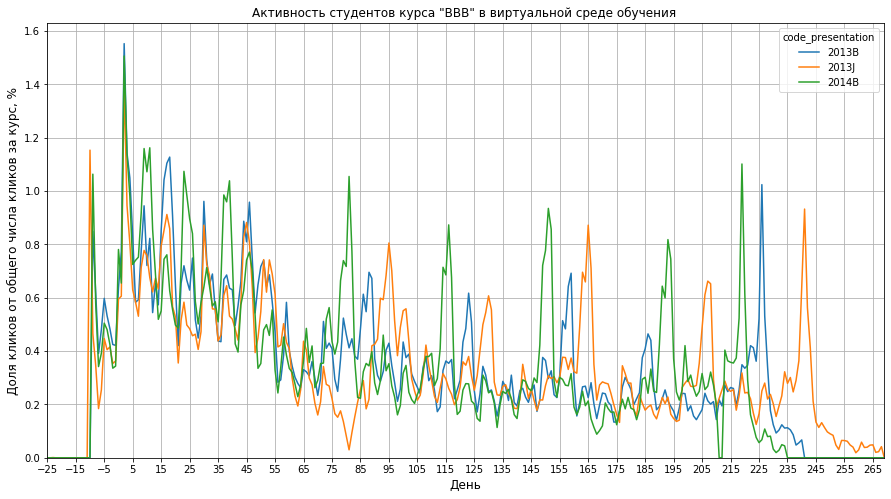

In [20]:
table_activity['BBB'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "BBB" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


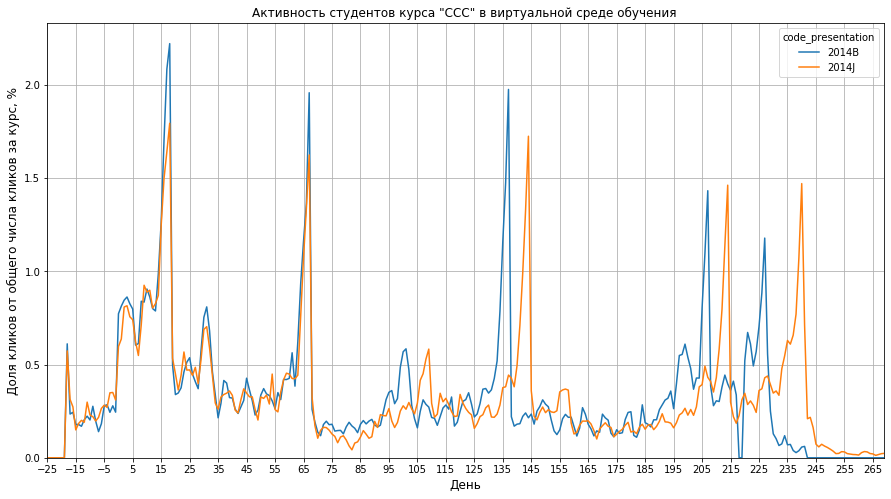

In [21]:
table_activity['CCC'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "CCC" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


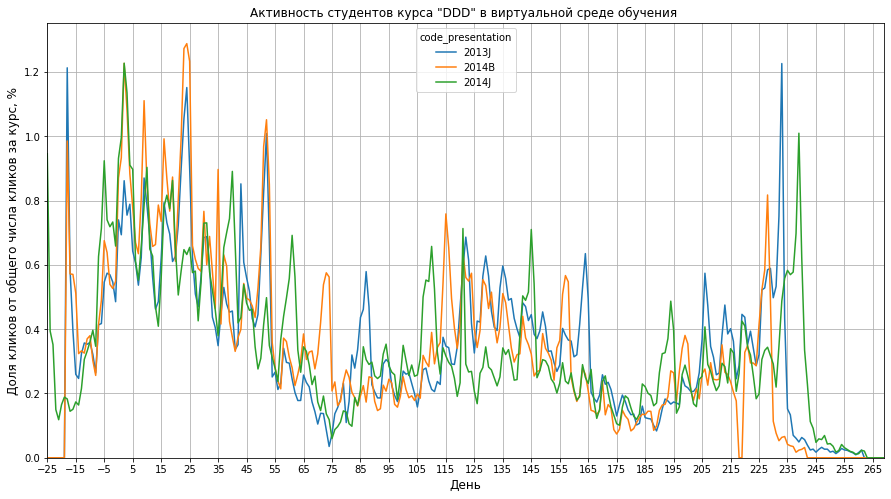

In [22]:
table_activity['DDD'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "DDD" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


In [23]:
assessment[(assessment.code_module == 'DDD')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
74,DDD,2013B,25341,CMA,23.0,2.0
75,DDD,2013B,25342,CMA,51.0,3.0
76,DDD,2013B,25343,CMA,79.0,3.0
77,DDD,2013B,25344,CMA,114.0,4.0
78,DDD,2013B,25345,CMA,149.0,4.0
79,DDD,2013B,25346,CMA,170.0,3.0
80,DDD,2013B,25347,CMA,206.0,6.0
81,DDD,2013B,25334,TMA,25.0,7.5
82,DDD,2013B,25335,TMA,53.0,10.0
83,DDD,2013B,25336,TMA,81.0,12.5


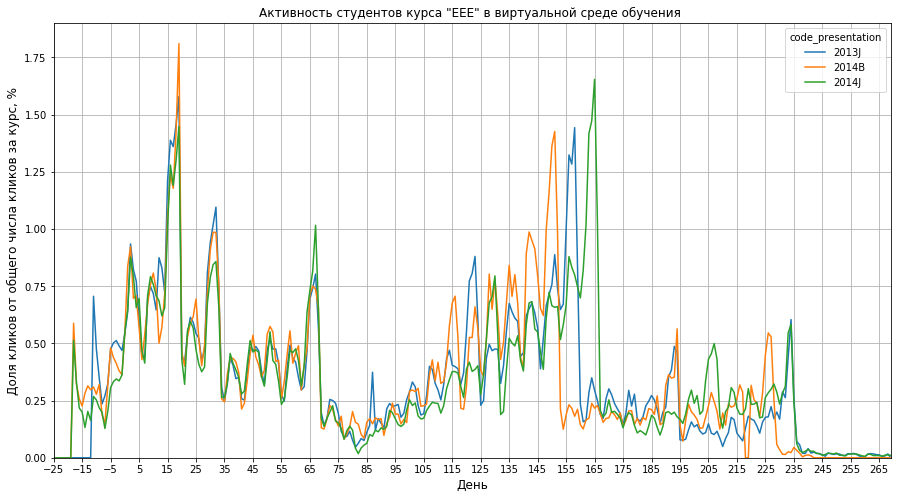

In [24]:
table_activity['EEE'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "EEE" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


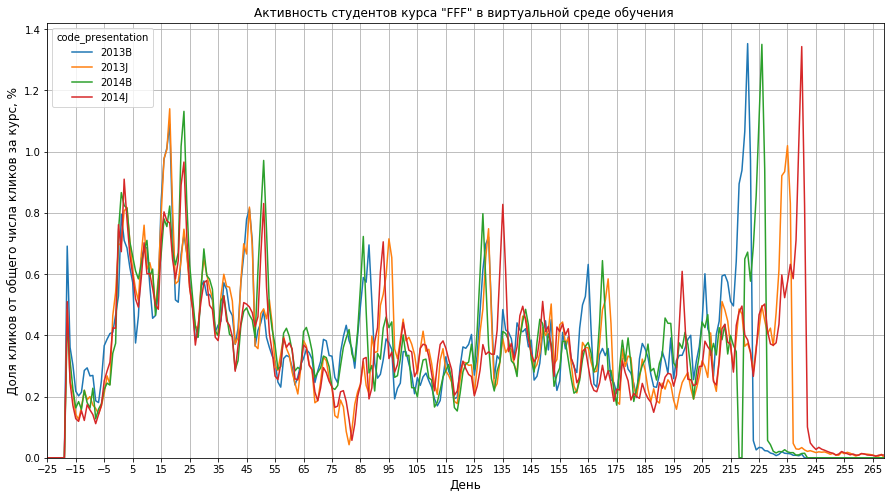

In [25]:
table_activity['FFF'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "FFF" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()

На графиках видно, что поведение студентов из разных потоков, но в рамках одного курса очень схоже. Имеет место быть небольшое смещение пиков кривых в силу изменения дат контрольных испытаний. 

Поведение студентов различных курсов различается между собой. Но это говорит скорее о специфике курса, нежели о специфике поведения студентов

Также можно увидеть, что во всех потоках, которые стартовали в феврале 2014 года (2014В), в районе 215 дня имеется нулевое значение активности. Поскольку данная ситуация наблюдается на всех курсах, можно сделать вывод о том, что это связано с неполадкой программного обеспечения, отвечающего за контроль активности студентов. На этом основании потоки 2014В не включены в рассмотрение.

ИТОГ: В нашу выборку мы берем по 1 потоку от каждого курса, за исключением тех, которые мы отсеяли ранее

##  Курс ААА

В рамках одного из потоков (2013 J) курса ААА разбиваем данные в зависимости от финального результата, полуенного студентом

In [26]:
st_VLE_AAA=total_table[(total_table.code_module == 'AAA')& (total_table.code_presentation =='2013J')]
AAA_pass=st_VLE_AAA[(st_VLE_AAA.final_result == 'Pass')]
AAA_wd=st_VLE_AAA[(st_VLE_AAA.final_result == 'Withdrawn')]
AAA_fail=st_VLE_AAA[(st_VLE_AAA.final_result == 'Fail')]
AAA_dist=st_VLE_AAA[(st_VLE_AAA.final_result == 'Distinction')]

st_VLE_AAA.head()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result
0,AAA,2013J,11391,-5,98,M,HE Qualification,55<=,N,Pass
1,AAA,2013J,11391,0,49,M,HE Qualification,55<=,N,Pass
2,AAA,2013J,11391,1,127,M,HE Qualification,55<=,N,Pass
3,AAA,2013J,11391,2,4,M,HE Qualification,55<=,N,Pass
4,AAA,2013J,11391,6,3,M,HE Qualification,55<=,N,Pass


In [27]:
AAA_fail.head()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result
1713,AAA,2013J,74372,-5,11,M,A Level or Equivalent,35-55,N,Fail
1714,AAA,2013J,74372,15,5,M,A Level or Equivalent,35-55,N,Fail
1715,AAA,2013J,74372,18,11,M,A Level or Equivalent,35-55,N,Fail
1716,AAA,2013J,74372,22,6,M,A Level or Equivalent,35-55,N,Fail
1717,AAA,2013J,74372,27,6,M,A Level or Equivalent,35-55,N,Fail


Проверяем на наличие незаполненных строк

In [28]:
st_VLE_AAA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34063 entries, 0 to 34062
Data columns (total 10 columns):
code_module          34063 non-null object
code_presentation    34063 non-null object
id_student           34063 non-null int64
date                 34063 non-null int64
sum_click            34063 non-null int64
gender               34063 non-null object
highest_education    34063 non-null object
age_band             34063 non-null object
disability           34063 non-null object
final_result         34063 non-null object
dtypes: int64(3), object(7)
memory usage: 2.9+ MB


## Определяем выбросы

Для определения выбросов в выборке рассмотрим по каждому студенту суммарное количество кликов  за весь курс

In [29]:
AAA_fail.groupby('id_student').sum().reset_index().head()

,id_student,date,sum_click
0,74372,1229,116
1,146188,3190,597
2,147756,6020,611
3,175991,1730,138
4,185439,199,427


Для наглядной демонстрации наличия/отсутствия выбросов построим диаграмму размаха (ящик с усами)

Text(0, 0.5, 'Суммарное количество кликов за курс')

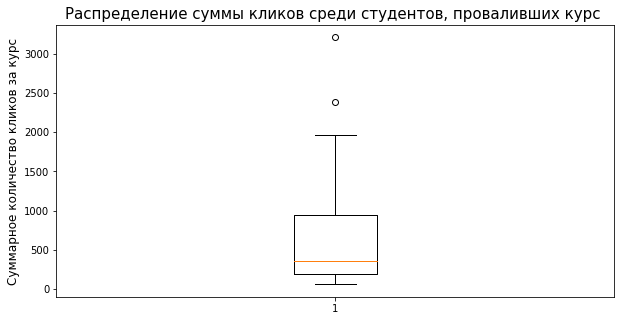

In [30]:
fig1, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_title('Распределение суммы кликов среди студентов, проваливших курс ', fontsize = 15)
ax1.boxplot(AAA_fail.groupby('id_student').sum().reset_index()['sum_click'])


plt.ylabel('Суммарное количество кликов за курс', fontsize = 12)

Text(0, 0.5, 'Суммарное количество кликов за курс')

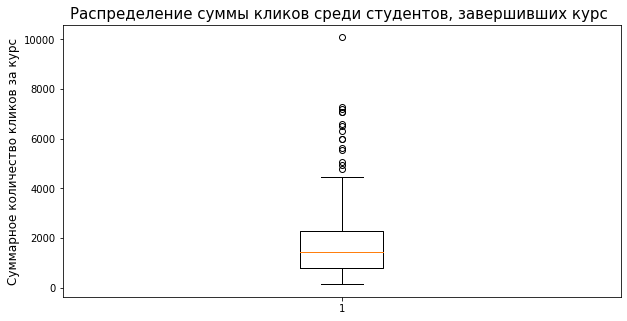

In [31]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.set_title('Распределение суммы кликов среди студентов, завершивших курс ', fontsize = 15)
ax2.boxplot(AAA_pass.groupby('id_student').sum().reset_index()['sum_click'])
plt.ylabel('Суммарное количество кликов за курс', fontsize = 12)

Из графика видно, что существуют выбросы, но необходимо точно расчитать границы выбросов для корректной фильтрации данных

Рассчитаем границы выбросов

Если выборка имеет вид Гауссовского (нормального) распределения или схожего с ним, мы можем использовать метод среднеквадратичного отклонения (σ) для нахождения выбросов.

Для выборок не нормального распределения лучше всего использовать метод интерквартильного интервала (IQR)*.

*Источник:https://trainmydata.com/article/statistichieskiie-mietody-dlia-opriedielieniia-vybrosov-v-dannykh 

Строим график частотного распределения суммарного числа кликов, сделанного студентом в течение курса

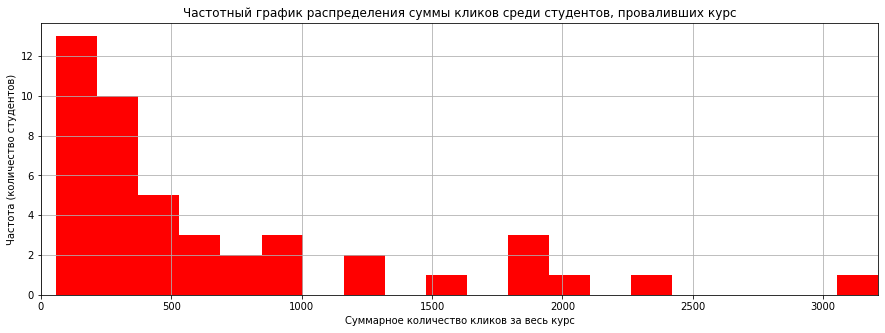

In [32]:
plt.figure(figsize=(15,5))

plt.hist(AAA_fail.groupby('id_student').sum().reset_index()['sum_click'],20, color = 'r')

plt.xlabel('Суммарное количество кликов за весь курс')
plt.ylabel('Частота (количество студентов)')
plt.title('Частотный график распределения суммы кликов среди студентов, проваливших курс',fontsize = 12)
plt.xlim(0, AAA_fail.groupby('id_student').sum().reset_index()['sum_click'].max())
plt.grid(True)

plt.show()


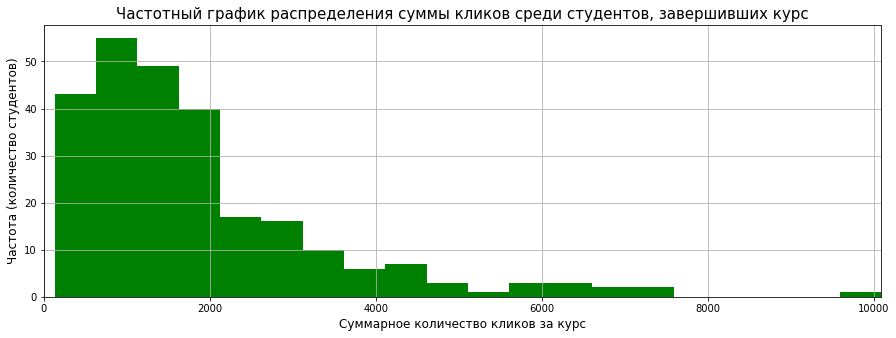

In [33]:
plt.figure(figsize=(15,5))

plt.hist(AAA_pass.groupby('id_student').sum().reset_index()['sum_click'],20, color = 'g')

plt.xlabel('Суммарное количество кликов за курс',fontsize = 12)
plt.ylabel('Частота (количество студентов)',fontsize = 12)
plt.title('Частотный график распределения суммы кликов среди студентов, завершивших курс',fontsize = 15)
plt.xlim(0, AAA_pass.groupby('id_student').sum().reset_index()['sum_click'].max())
plt.grid(True)

plt.show()


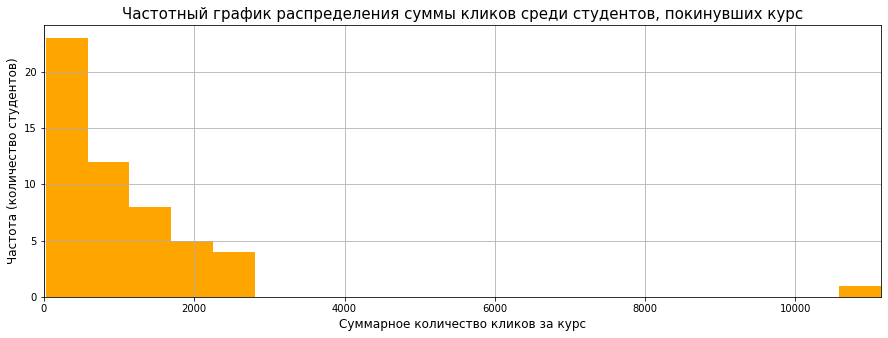

In [34]:
plt.figure(figsize=(15,5))

plt.hist(AAA_wd.groupby('id_student').sum().reset_index()['sum_click'],20, color = 'orange')

plt.xlabel('Суммарное количество кликов за курс',fontsize = 12)
plt.ylabel('Частота (количество студентов)',fontsize = 12)
plt.title('Частотный график распределения суммы кликов среди студентов, покинувших курс',fontsize = 15)
plt.xlim(0, AAA_wd.groupby('id_student').sum().reset_index()['sum_click'].max())
plt.grid(True)

plt.show()

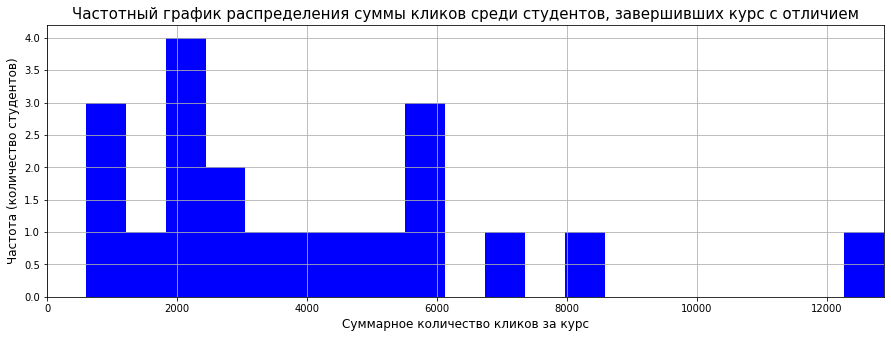

In [35]:
plt.figure(figsize=(15,5))

plt.hist(AAA_dist.groupby('id_student').sum().reset_index()['sum_click'],20, color = 'b')

plt.xlabel('Суммарное количество кликов за курс',fontsize = 12)
plt.ylabel('Частота (количество студентов)',fontsize = 12)
plt.title('Частотный график распределения суммы кликов среди студентов, завершивших курс с отличием',fontsize = 15)
plt.xlim(0, AAA_dist.groupby('id_student').sum().reset_index()['sum_click'].max())
plt.grid(True)

plt.show()

Ни в одной выборке распределение не является нормальным, поэтому применяем метод интерквартильного интервала (IQR)

In [36]:
q25_f, q75_f = percentile(AAA_fail.groupby('id_student').sum().reset_index()['sum_click'], 25), \
                    percentile(AAA_fail.groupby('id_student').sum().reset_index()['sum_click'], 75)
iqr_f = q75_f - q25_f
cut_off_f = iqr_f * 1.5
lower_f , upper_f = q25_f- cut_off_f, q75_f + cut_off_f

print('нижняя граница - ', lower_f ,';', 'верхняя граница - ', upper_f)

нижняя граница -  -923.5 ; верхняя граница -  2056.5


In [37]:
q25_p, q75_p = percentile(AAA_pass.groupby('id_student').sum().reset_index()['sum_click'], 25), \
                    percentile(AAA_pass.groupby('id_student').sum().reset_index()['sum_click'], 75)
iqr_p = q75_p - q25_p
cut_off_p = iqr_p * 1.5
lower_p , upper_p = q25_p- cut_off_p, q75_p + cut_off_p

print('нижняя граница - ', lower_p ,';', 'верхняя граница - ', upper_p)

нижняя граница -  -1448.5 ; верхняя граница -  4505.5


In [38]:
q25_d, q75_d = percentile(AAA_dist.groupby('id_student').sum().reset_index()['sum_click'], 25), \
                    percentile(AAA_dist.groupby('id_student').sum().reset_index()['sum_click'], 75)
iqr_d = q75_d - q25_d
cut_off_d = iqr_d * 1.5
lower_d , upper_d = q25_d- cut_off_d, q75_d + cut_off_d

print('нижняя граница - ', lower_d ,';', 'верхняя граница - ', upper_d)

нижняя граница -  -3124.625 ; верхняя граница -  11080.375


In [39]:
q25_wd, q75_wd = percentile(AAA_wd.groupby('id_student').sum().reset_index()['sum_click'], 25), \
                        percentile(AAA_wd.groupby('id_student').sum().reset_index()['sum_click'], 75)
iqr_wd = q75_wd - q25_wd
cut_off_wd = iqr_wd * 1.5
lower_wd , upper_wd = q25_wd- cut_off_wd, q75_wd + cut_off_wd

print('нижняя граница - ', lower_wd ,';', 'верхняя граница - ', upper_wd)

нижняя граница -  -1329.5 ; верхняя граница -  3066.5


Рассчитаем, сколько выбросов в каждой выборке

In [40]:
AAA_fail.groupby('id_student').sum()['sum_click'][(AAA_fail.groupby('id_student').sum()['sum_click'] >=upper_f)].count()

2

In [41]:
AAA_pass.groupby('id_student').sum()['sum_click'][(AAA_pass.groupby('id_student').sum()['sum_click'] >=upper_p)].count()

15

In [42]:
AAA_dist.groupby('id_student').sum()['sum_click'][(AAA_dist.groupby('id_student').sum()['sum_click'] >=upper_d)].count()

1

In [43]:
AAA_wd.groupby('id_student').sum()['sum_click'][(AAA_wd.groupby('id_student').sum()['sum_click'] >= upper_wd)].count()

1

#### Исключаем выбросы

Создаем списки студентов, которые попали в финальную выборку

In [44]:
pass_list=AAA_pass.groupby('id_student').sum().reset_index()\
           [(AAA_pass.groupby('id_student').sum().reset_index()['sum_click']< upper_p)]['id_student'].tolist()
len(pass_list)

243

In [45]:
fail_list=AAA_fail.groupby('id_student').sum().reset_index()\
           [(AAA_fail.groupby('id_student').sum().reset_index()['sum_click']< upper_f)]['id_student'].tolist()

wd_list=AAA_wd.groupby('id_student').sum().reset_index()\
           [(AAA_wd.groupby('id_student').sum().reset_index()['sum_click']< upper_wd)]['id_student'].tolist()

dist_list=AAA_dist.groupby('id_student').sum().reset_index()\
           [(AAA_dist.groupby('id_student').sum().reset_index()['sum_click']< upper_d)]['id_student'].tolist()

Фильтруем данные так, чтобы в выборке остались только id студентов из списков

In [46]:
AAA_pass_cln= AAA_pass[(AAA_pass.id_student.isin(pass_list))]
AAA_dist_cln=AAA_dist[(AAA_dist.id_student.isin(dist_list))]
AAA_wd_cln=AAA_wd[(AAA_wd.id_student.isin(wd_list))]
AAA_fail_cln=AAA_fail[(AAA_fail.id_student.isin(fail_list))]

AAA_cln= pd.concat([AAA_pass_cln, AAA_fail_cln, AAA_dist_cln, AAA_wd_cln], ignore_index=True)

In [47]:
AAA_pass_cln.head()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result
0,AAA,2013J,11391,-5,98,M,HE Qualification,55<=,N,Pass
1,AAA,2013J,11391,0,49,M,HE Qualification,55<=,N,Pass
2,AAA,2013J,11391,1,127,M,HE Qualification,55<=,N,Pass
3,AAA,2013J,11391,2,4,M,HE Qualification,55<=,N,Pass
4,AAA,2013J,11391,6,3,M,HE Qualification,55<=,N,Pass


Создаем общую таблицу с колнками "дата"  и суммами кликов по каждой группе студентов

In [48]:
AAA_pass=AAA_pass_cln.iloc[:,[3,4]].groupby('date').sum().reset_index()
AAA_dist=AAA_dist_cln.iloc[:,[3,4]].groupby('date').sum().reset_index()
AAA_wd=AAA_wd_cln.iloc[:,[3,4]].groupby('date').sum().reset_index()
AAA_fail=AAA_fail_cln.iloc[:,[3,4]].groupby('date').sum().reset_index()

AAA_graph=AAA_pass.merge(AAA_dist, how ='outer', on='date').merge(AAA_wd, how ='outer', on='date')\
                .merge(AAA_fail, how ='outer', on='date')

AAA_graph.columns = ['date', 'pass_clicks', 'dist_clicks', 'wd_clicks', 'fail_clicks']
AAA_graph.tail(16)


,date,pass_clicks,dist_clicks,wd_clicks,fail_clicks
263,253,122,21,3.0,NaN
264,254,74,17,NaN,NaN
265,255,81,11,NaN,2.0
266,256,73,24,NaN,1.0
267,257,69,9,NaN,NaN
268,258,35,3,NaN,3.0
269,259,12,1,NaN,NaN
270,260,36,1,NaN,4.0
271,261,61,11,NaN,1.0
272,262,88,15,NaN,11.0


В таблице присутствуют пустые строки, которые свидетельствуют об отсутствии активности всех студентов конкретной группы в этот день. То есть количество кликов = 0. Заменим пустые значения на 0

In [49]:
AAA_graph= AAA_graph.fillna(0)
AAA_graph.tail()

,date,pass_clicks,dist_clicks,wd_clicks,fail_clicks
274,264,74,8,0.0,0.0
275,265,73,13,0.0,0.0
276,266,28,14,0.0,0.0
277,267,35,5,0.0,0.0
278,268,86,12,0.0,0.0


Поскольку группы  отличаются по количеству студентов (а соответственно и по количеству кликов), будем сравнивать их между собой по % соотношению суммы кликов, сделанных в конкретный день к общей сумме кликов в группе

In [50]:
pass_clicks_sum= AAA_graph.pass_clicks.sum()
dist_clicks_sum= AAA_graph.dist_clicks.sum()
fail_clicks_sum= AAA_graph.fail_clicks.sum()
wd_clicks_sum= AAA_graph.wd_clicks.sum()

In [51]:
AAA_graph.sum()

date            35991.0
pass_clicks    380546.0
dist_clicks     69537.0
wd_clicks       47612.0
fail_clicks     24681.0
dtype: float64

In [52]:
AAA_graph['pass_%']=round(AAA_graph['pass_clicks']/pass_clicks_sum*100,2)
AAA_graph['dist_%']=round(AAA_graph['dist_clicks']/dist_clicks_sum*100,2)
AAA_graph['wd_%']=round(AAA_graph['wd_clicks']/wd_clicks_sum*100,2)
AAA_graph['fail_%']=round(AAA_graph['fail_clicks']/fail_clicks_sum*100,2)
AAA_graph.head()

,date,pass_clicks,dist_clicks,wd_clicks,fail_clicks,pass_%,dist_%,wd_%,fail_%
0,-10,7148,1643,1349.0,440.0,1.88,2.36,2.83,1.78
1,-9,3172,680,587.0,186.0,0.83,0.98,1.23,0.75
2,-8,1921,361,346.0,324.0,0.50,0.52,0.73,1.31
3,-7,1961,384,591.0,87.0,0.52,0.55,1.24,0.35
4,-6,2487,253,663.0,71.0,0.65,0.36,1.39,0.29


Рисуем график динамики кликов в течение курса

(-10, 281.9)

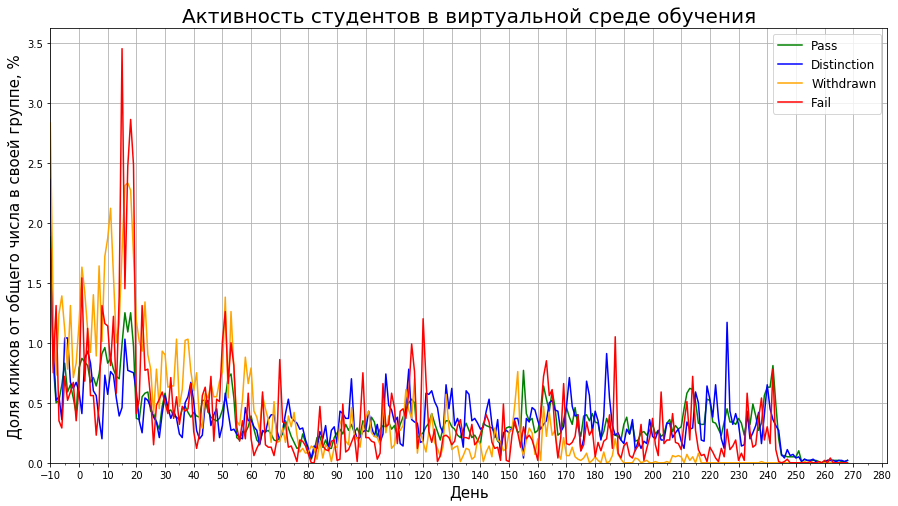

In [53]:
x = AAA_graph['date']
y1 = AAA_graph['pass_%']
y2 = AAA_graph['dist_%']
y3 = AAA_graph['wd_%']
y4 = AAA_graph['fail_%']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(-10)


### Аналогичная статистика с рандомной  малой выборкой

(-10, 281.9)

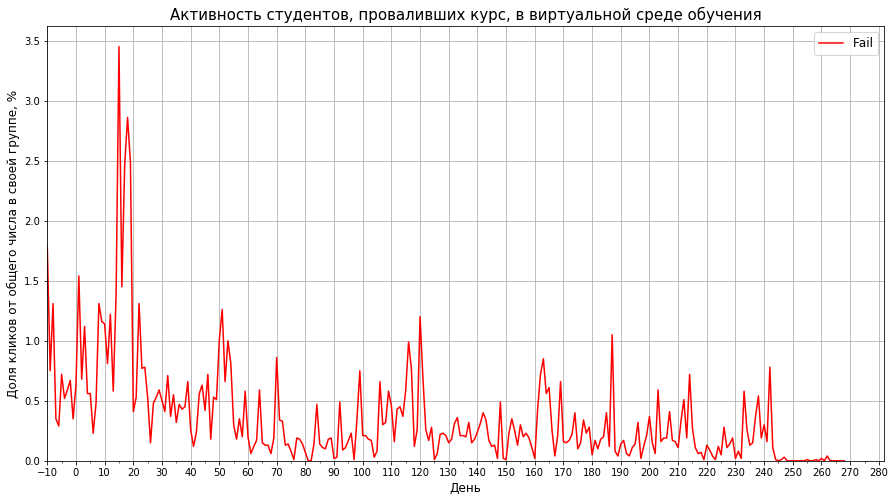

In [54]:
x = AAA_graph['date']
y1 = AAA_graph['fail_%']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'r', label='Fail',)


ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)
plt.title('Активность студентов, проваливших курс, в виртуальной среде обучения', fontsize= 15)
plt.xlabel('День',fontsize =12)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =12)

plt.grid(True)

plt.ylim(0)
plt.xlim(AAA_graph['date'].min())

In [55]:
Fail_30=random.sample(AAA_fail_cln['id_student'].unique().tolist(),30)
#Pass_30

In [56]:
AAA_fail_30=AAA_fail_cln[AAA_fail_cln['id_student'].isin(Fail_30)]

In [57]:
AAA_fail_30=AAA_fail_30.iloc[:,[3,4]].groupby('date').sum().reset_index()

In [58]:
fail_30_sum=AAA_fail_30['sum_click'].sum()

In [59]:
AAA_fail_30['fail_%']= AAA_fail_30['sum_click']/fail_30_sum*100
AAA_fail_30.head()

,date,sum_click,fail_%
0,-10,331,1.691191
1,-9,102,0.521153
2,-8,247,1.262007
3,-7,75,0.383200
4,-6,71,0.362763


(-10, 275.6)

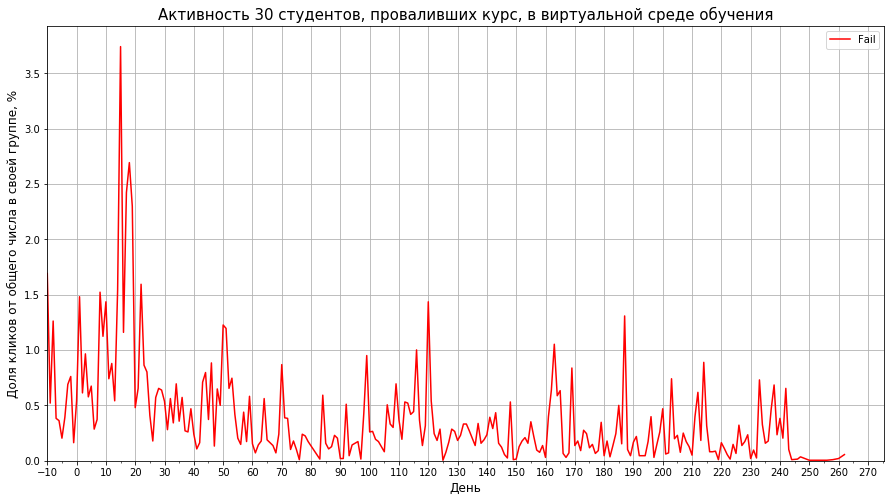

In [60]:
x = AAA_fail_30['date']
y1 = AAA_fail_30['fail_%']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'r', label='Fail',)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend()
plt.title('Активность 30 студентов, проваливших курс, в виртуальной среде обучения', fontsize = 15)
plt.xlabel('День', fontsize = 12)
plt.ylabel('Доля кликов от общего числа в своей группе, %', fontsize = 12)

plt.grid(True)

plt.ylim(0)
plt.xlim(AAA_graph['date'].min())

## Сравнение поведения студентов разных групп

Для того, чтобы понять, отличается ли поведение студентов из разных групп, нужно провести тестирование, которое покажет, существует ли статистическое различие выборками.

Выбор вида теста зависит в частности от вида распределения данных

Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

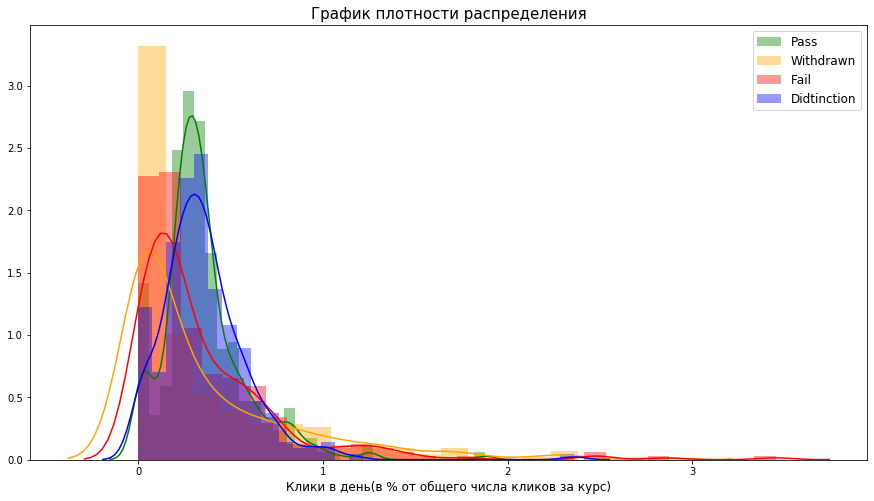

In [61]:
plt.figure(figsize=(15,8))
sns.distplot(AAA_graph['pass_%'], color ='g')
sns.distplot(AAA_graph['wd_%'], color ='orange')
sns.distplot(AAA_graph['fail_%'], color ='r')
sns.distplot(AAA_graph['dist_%'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Данные распределены ненормально, моэтому используем критерий Манна-Уитни

Условимся, что уровень значимости равен 5%

#### PASS / FAIL

In [62]:
u, p_value = sts.mannwhitneyu(AAA_graph['pass_%'], AAA_graph['fail_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 1.7468999968335857e-05


Поскольку p-value < 0,05,  можно отвергнуть гипотезу Н0 об идентичности выборок, и говорим о существовании статистическом различии в поведении между провалившими и закончившими курс студентами

#### PASS / WITHDRAWN

In [63]:
u, p_value = sts.mannwhitneyu(AAA_graph['pass_%'], AAA_graph['wd_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 9.825005041298349e-09


P-value < 0,05,  Н0 отвергаем \
Существует разница в поведении между покинувшими и закончившими курс студентами

#### DISTINCTION / FAIL

In [64]:
u, p_value = sts.mannwhitneyu(AAA_graph['dist_%'], AAA_graph['fail_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 5.309727227661269e-05


P-value < 0,05,  Н0 отвергаем \
Существует разница в поведении между провалившими и закончившими курс с отличием студентами

#### DISTINCTION / WITHDRAWN

In [65]:
u, p_value = sts.mannwhitneyu(AAA_graph['dist_%'], AAA_graph['wd_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.3831219877723363e-08


P-value < 0,05,  Н0 отвергаем \
Существует разница в поведении между покинувшими и закончившими курс с отличием студентами

#### DISTINCTION / PASS

In [66]:
u, p_value = sts.mannwhitneyu(AAA_graph['pass_%'], AAA_graph['dist_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.4091227278697891


P-value > 0,05,  Н0 принимаем \
Делаем вывод о схожести поведения студентов, которые закончили курс (с отличием и без)

#### FAIL/ WITHDRAWN

In [67]:
u, p_value = sts.mannwhitneyu(AAA_graph['fail_%'], AAA_graph['wd_%'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0026807670030572386


P-value < 0,05,  Н0 отвергаем \
Существует разница в поведении между покинувшими и проваливими курс  студентами

### Коэффициент

Рассчитаем коэффициент "равномерности" работы с VLE. Этот коэффициент отображает периодичность занятий. \
Измеряется от 0 до 1, чем ближе к 1, тем чаще студенты взаимодействуют с VLE. \
Формула:\
        ∑(количество дней взаимодействия)/ Количество дней в курсе/ Количество студентов

In [68]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [69]:
days_courses = courses[(courses.code_module == 'AAA') & \
                       (courses.code_presentation == '2013J')]['module_presentation_length'][0] - AAA_wd_cln.date.min()

days_courses

278

In [70]:
days_VLE_wd = AAA_wd_cln.date.count()
days_VLE_fail = AAA_fail_cln.date.count()
days_VLE_pass = AAA_pass_cln.date.count()
days_VLE_dist = AAA_dist_cln.date.count()
days_VLE_wd

2170

In [71]:
student_wd=len(AAA_wd_cln.id_student.unique())
student_fail=len(AAA_fail_cln.id_student.unique())
student_pass=len(AAA_pass_cln.id_student.unique())
student_dist=len(AAA_dist_cln.id_student.unique())

In [72]:
ind_wd=days_VLE_wd/student_wd/days_courses
ind_fail=days_VLE_fail/student_fail/days_courses
ind_pass=days_VLE_pass/student_pass/days_courses
ind_dist=days_VLE_dist/student_dist/days_courses

print ('индекс равномерности взаимодействия с VLE среди покинувших курс:', round(ind_wd,2))
print ('среди проваливших курс:', round(ind_fail ,2))
print ('среди завершивших курс:', round(ind_pass,2)) 
print ('среди отличников:', round(ind_dist,2))


индекс равномерности взаимодействия с VLE среди покинувших курс: 0.15
среди проваливших курс: 0.14
среди завершивших курс: 0.34
среди отличников: 0.61


### Среднее количество кликов

Посмотрим также какое среднее кличество кликов делают студенты разных групп в период контрольных испытаний и период обучения без оценки.\

Создаем список, который будет включать даты, относящиеся к периоду контрольных испытаний. Заранее условились, что этот период начинается за 5 дней до испытания и заканчивается непосредственно в день испытания.

In [73]:
dates = assessment[(assessment.code_module == 'AAA')&(assessment.code_presentation== '2013J')&(assessment.assessment_type!= 'Exam')]['date'].tolist()

In [74]:
dates_full_list=[]
for date in dates:
    for z in range (0, len(dates)):
        dates_full_list.append(date-z)
dates_full_list

[19.0,
 18.0,
 17.0,
 16.0,
 15.0,
 54.0,
 53.0,
 52.0,
 51.0,
 50.0,
 117.0,
 116.0,
 115.0,
 114.0,
 113.0,
 166.0,
 165.0,
 164.0,
 163.0,
 162.0,
 215.0,
 214.0,
 213.0,
 212.0,
 211.0]

Добавляем новый столбец 'period_type' к общей таблице по всем студентам (AAA_cln), отображающий характеристику периода.

Условно периоды разделили на 2 типа:\
study period - период обучения без контрольных испытаний\
assessment period - 5-дневный период перед контрольным испытанием

In [75]:
def period_type(a):
    if a.date in dates_full_list:
        return 'assessment period'
    return 'study period'

In [76]:
AAA_cln['period_type'] = AAA_cln.apply(period_type, axis=1)
AAA_cln.tail()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result,period_type
29973,AAA,2013J,2576122,23,15,M,A Level or Equivalent,0-35,N,Withdrawn,study period
29974,AAA,2013J,2576122,24,9,M,A Level or Equivalent,0-35,N,Withdrawn,study period
29975,AAA,2013J,2576122,29,6,M,A Level or Equivalent,0-35,N,Withdrawn,study period
29976,AAA,2013J,2576122,32,4,M,A Level or Equivalent,0-35,N,Withdrawn,study period
29977,AAA,2013J,2576122,37,1,M,A Level or Equivalent,0-35,N,Withdrawn,study period


Смотрим, какое среднее число кликов в день делает каждая из групп в период испытаний и в обычном режиме.

In [77]:
mean_table_FR =  pd.pivot_table(AAA_cln, values='sum_click', index=['period_type'], \
                                columns=['final_result'],  aggfunc=np.mean)
mean_table_FR

final_result,Distinction,Fail,Pass,Withdrawn
period_type,,,,
assessment period,23.265306,18.646018,19.033446,27.633634
study period,21.538488,13.794140,16.186401,20.909091


### ДЕРЕВО РЕШЕНИЙ
#### Подготовка данных

In [78]:
total_table.head()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,age_band,disability,final_result
0,AAA,2013J,11391,-5,98,M,HE Qualification,55<=,N,Pass
1,AAA,2013J,11391,0,49,M,HE Qualification,55<=,N,Pass
2,AAA,2013J,11391,1,127,M,HE Qualification,55<=,N,Pass
3,AAA,2013J,11391,2,4,M,HE Qualification,55<=,N,Pass
4,AAA,2013J,11391,6,3,M,HE Qualification,55<=,N,Pass


In [79]:
dates_AAA = assessment[(assessment.code_module == 'AAA')&(assessment.code_presentation== '2013J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_BBB = assessment[(assessment.code_module == 'BBB')&(assessment.code_presentation== '2013B')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_CCC = assessment[(assessment.code_module == 'CCC')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_DDD = assessment[(assessment.code_module == 'DDD')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_EEE = assessment[(assessment.code_module == 'EEE')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_FFF = assessment[(assessment.code_module == 'FFF')&(assessment.code_presentation== '2013B')&(assessment.date.isnull() == False)]['date'].unique().tolist()


In [80]:
full_dates_AAA=[date-z for date in dates_AAA for z in range (0, 5) ]
full_dates_BBB=[date-z for date in dates_BBB for z in range (0, 5)]
full_dates_CCC=[date-z for date in dates_CCC for z in range (0, 5)]
full_dates_DDD=[date-z for date in dates_DDD for z in range (0, 5)]
full_dates_EEE=[date-z for date in dates_EEE for z in range (0, 5)]
full_dates_FFF=[date-z for date in dates_FFF for z in range (0, 5)]

assessment_dates =dict(zip(list(students_reg.code_module.unique()),\
                        [full_dates_AAA, full_dates_BBB, full_dates_CCC, full_dates_DDD, full_dates_EEE, full_dates_FFF]))

In [81]:
def study_period(a):
    if a.code_module in list(assessment_dates.keys()):
        if a.date in assessment_dates[a.code_module]:
            return 'assessment period'
    return 'study period'

In [187]:
activity_table=st_VLE.merge(VLE.iloc[:,:4], how ='inner', on=['code_module','code_presentation','id_site'])

In [188]:
st_VLE.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [189]:
activity_table=st_VLE[(st_VLE.id_student.isin(total_table.id_student.unique().tolist()))]

In [190]:
activity_table=activity_table[((activity_table.code_module == "AAA") & (activity_table.code_presentation == "2013J")) | \
                                 ((activity_table.code_module == "BBB") & (activity_table.code_presentation == "2013B")) | \
                                 ((activity_table.code_module == "CCC") & (activity_table.code_presentation == "2014J")) | \
                                 ((activity_table.code_module == "DDD") & (activity_table.code_presentation == "2014J")) | \
                                 ((activity_table.code_module == "EEE") & (activity_table.code_presentation == "2014J")) | \
                                 ((activity_table.code_module == "FFF") & (activity_table.code_presentation == "2013B"))]

In [191]:
activity_table['period_type'] = activity_table.apply(study_period, axis=1)

In [260]:
activity_table.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,period_type
0,AAA,2013J,28400,546652,-10,4,study period
1,AAA,2013J,28400,546652,-10,1,study period
2,AAA,2013J,28400,546652,-10,1,study period
3,AAA,2013J,28400,546614,-10,11,study period
4,AAA,2013J,28400,546714,-10,1,study period


In [262]:
period=pd.pivot_table(activity_table, values=['sum_click', 'date'], index=['code_module','id_student'], \
                                columns=['period_type'],  aggfunc={'date': pd.Series.nunique,  'sum_click':  np.sum}, fill_value=0).reset_index()
period.columns=['code_module','id_student','date_assessment_period','date_study_period','clicks_assessment_period','clicks_study_period']

period.head()

,code_module,id_student,date_assessment_period,date_study_period,clicks_assessment_period,clicks_study_period
0,AAA,11391,5,35,120,814
1,AAA,28400,7,73,150,1285
2,AAA,30268,0,12,0,281
3,AAA,31604,18,105,329,1829
4,AAA,32885,3,67,36,998


In [281]:
activity_table_2 = activity_table.groupby(['code_module','code_presentation','id_student']).agg({'date':[np.min, pd.Series.nunique],  'sum_click':  np.sum}).reset_index()
activity_table_2.columns=['code_module','code_presentation','id_student','start_activity_date', 'active_days','total_clicks']
activity_table_2.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks
0,AAA,2013J,11391,-5,40,934
1,AAA,2013J,28400,-10,80,1435
2,AAA,2013J,30268,-10,12,281
3,AAA,2013J,31604,-10,123,2158
4,AAA,2013J,32885,-10,70,1034


In [304]:
activity_table_3=activity_table_2.merge(registration, how='left', on =['code_module','code_presentation','id_student']).drop(['date_registration'], axis=1)
activity_table_4=activity_table_3.merge(period, on =['code_module','id_student'], how= 'left')
activity_table_4.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,date_assessment_period,date_study_period,clicks_assessment_period,clicks_study_period
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998


In [305]:
activity_table_4.columns.values[7:11]=['active_days_assessment','active_days_study', 'clicks_assessment', 'clicks_study']
activity_table_4.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,active_days_assessment,active_days_study,clicks_assessment,clicks_study
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998


In [306]:
def days_on_course(a):
    if pd.isna(a.date_unregistration) == True:
        return int((courses[((courses.code_module == a.code_module)& (courses.code_presentation == a.code_presentation))]['module_presentation_length'] - a.start_activity_date))
    return (a.date_unregistration - a.start_activity_date)

In [307]:
activity_table_4['days_on_course'] = activity_table_4.apply(days_on_course, axis=1)

In [308]:
activity_table_4.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,active_days_assessment,active_days_study,clicks_assessment,clicks_study,days_on_course
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814,273.0
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285,278.0
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281,22.0
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829,278.0
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998,278.0


In [318]:
activity_table_5=activity_table_4[activity_table_4.days_on_course != 0]

In [319]:
activity_table_5.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,active_days_assessment,active_days_study,clicks_assessment,clicks_study,days_on_course
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814,273.0
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285,278.0
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281,22.0
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829,278.0
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998,278.0


In [320]:
activity_table_5['activity_index']= round(activity_table_5.active_days/activity_table_5.days_on_course, 2)

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [321]:
activity_table_5['mean_clicks']= round(activity_table_5.total_clicks/activity_table_5.active_days,2).fillna(0)
activity_table_5['mean_clicks_assessment']=round(activity_table_5.clicks_assessment/activity_table_5.active_days_assessment,2).fillna(0)
activity_table_5['mean_clicks_study']=round(activity_table_5.clicks_study/activity_table_5.active_days_study,2).fillna(0)

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

### Модель

In [342]:
model_table=activity_table_5.merge(students.iloc[:,[0,1,2,11]], how='left', on =['code_module','code_presentation','id_student']).drop(['start_activity_date','date_unregistration','days_on_course'], axis =1)

In [343]:
model_table.columns

Index(['code_module', 'code_presentation', 'id_student', 'active_days',
       'total_clicks', 'active_days_assessment', 'active_days_study',
       'clicks_assessment', 'clicks_study', 'activity_index', 'mean_clicks',
       'mean_clicks_assessment', 'mean_clicks_study', 'final_result'],
      dtype='object')

In [344]:
dummies = pd.get_dummies(model_table.final_result)
model_table_dummies= pd.concat([model_table, dummies], axis =1)
model_table_dummies= model_table_dummies.drop('final_result', axis =1)


In [345]:
#model_table_dummies.iloc[:,13:-4].columns =['dataplus','dualpane','externalquiz', 'forumng', 'glossary', 'homepage', 'oucollaborate', \
#'oucontent', 'ouelluminate', 'ouwiki','page', 'questionnaire','quiz','resource', 'sharedsubpage','subpage','url']
model_table_dummies.iloc[:,3:-4].columns

Index(['active_days', 'total_clicks', 'active_days_assessment',
       'active_days_study', 'clicks_assessment', 'clicks_study',
       'activity_index', 'mean_clicks', 'mean_clicks_assessment',
       'mean_clicks_study'],
      dtype='object')

In [346]:
X_data= model_table_dummies.iloc[:,3:-4]
X_data.corr()

,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study
active_days,1.000000,0.815826,0.848403,0.995759,0.602841,0.817781,0.646553,0.278852,0.238985,0.338342
total_clicks,0.815826,1.000000,0.681875,0.814152,0.795393,0.988021,0.564967,0.628529,0.486429,0.651392
active_days_assessment,0.848403,0.681875,1.000000,0.796102,0.708579,0.631383,0.488718,0.266345,0.313639,0.260490
active_days_study,0.995759,0.814152,0.796102,1.000000,0.566022,0.825162,0.654208,0.272495,0.218698,0.341524
clicks_assessment,0.602841,0.795393,0.708579,0.566022,1.000000,0.692331,0.386608,0.621225,0.732061,0.490024
clicks_study,0.817781,0.988021,0.631383,0.825162,0.692331,1.000000,0.574180,0.590115,0.392718,0.650741
activity_index,0.646553,0.564967,0.488718,0.654208,0.386608,0.574180,1.000000,0.228728,0.194892,0.267707
mean_clicks,0.278852,0.628529,0.266345,0.272495,0.621225,0.590115,0.228728,1.000000,0.712610,0.910793
mean_clicks_assessment,0.238985,0.486429,0.313639,0.218698,0.732061,0.392718,0.194892,0.712610,1.000000,0.447675
mean_clicks_study,0.338342,0.651392,0.260490,0.341524,0.490024,0.650741,0.267707,0.910793,0.447675,1.000000


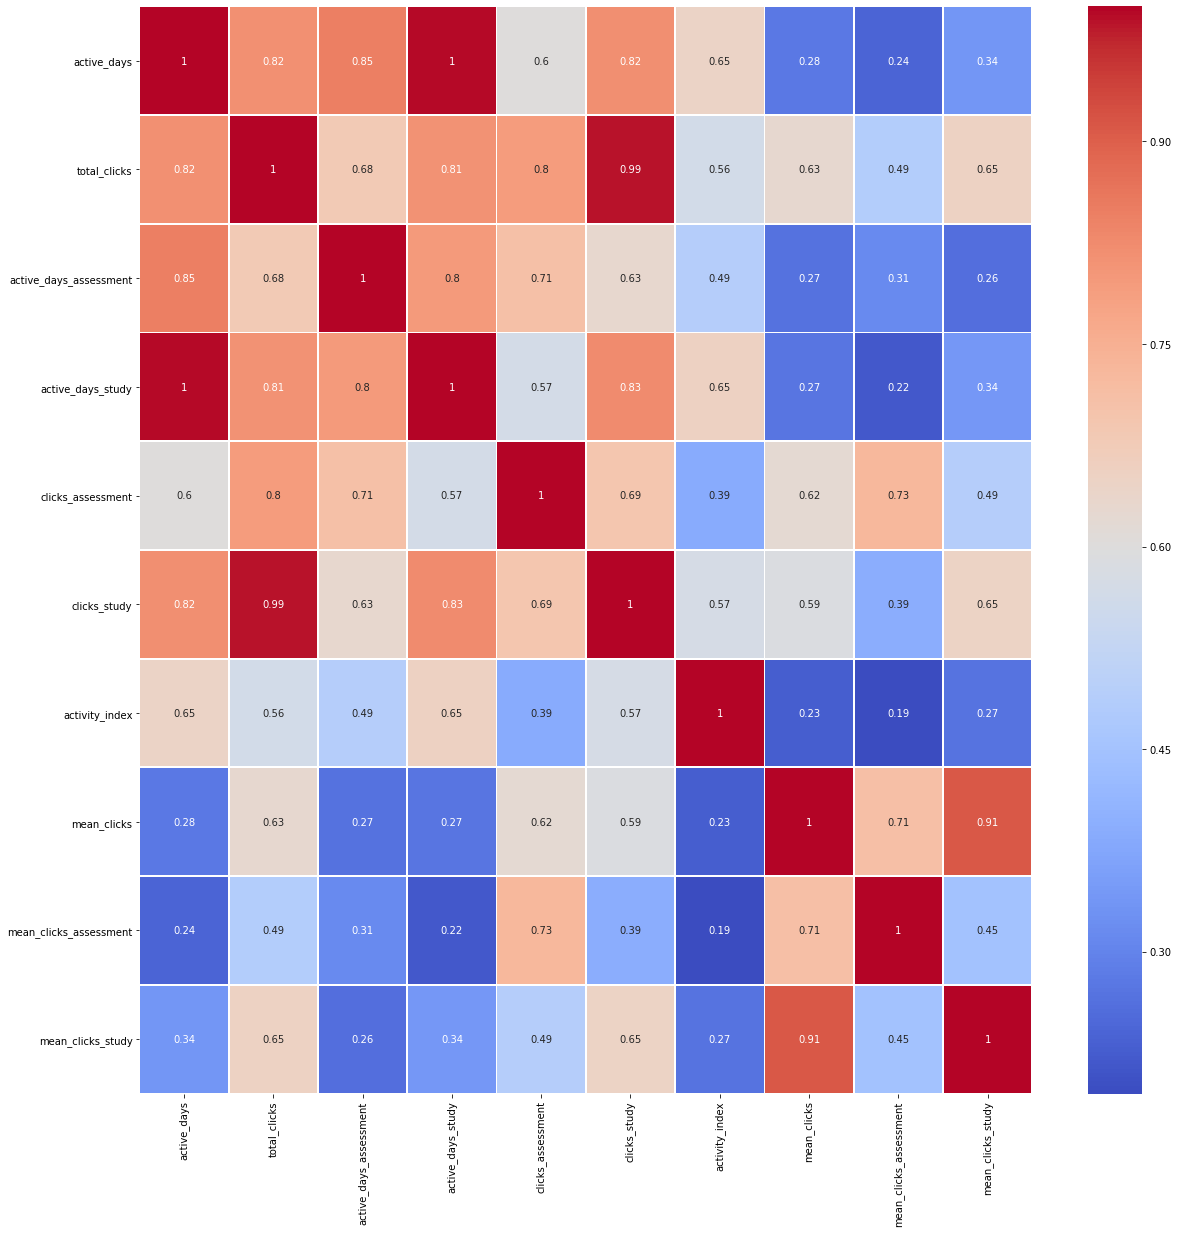

In [347]:
sns.heatmap(X_data.corr(),annot=True,cmap='coolwarm',linewidths=0.8,) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [348]:
# создаем матрицу корреляций
corr_matrix = X_data.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['active_days_study', 'clicks_study']


In [349]:
X_data = X_data.drop(X_data[to_drop], axis=1)
X_data.head()

,active_days,total_clicks,active_days_assessment,clicks_assessment,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study
0,40,934,5,120,0.15,23.35,24.00,23.26
1,80,1435,7,150,0.29,17.94,21.43,17.60
2,12,281,0,0,0.55,23.42,0.00,23.42
3,123,2158,18,329,0.44,17.54,18.28,17.42
4,70,1034,3,36,0.25,14.77,12.00,14.90


In [350]:
Y= model_table_dummies.iloc[:,-4:]
X= model_table_dummies.iloc[:,3:-4]


In [351]:
print('Количество значений Distinction: ', Y[Y.Distinction ==1].shape)
print('Количество значений Fail: ', Y[Y.Fail ==1].shape)
print('Количество значений Pass: ', Y[Y.Pass ==1].shape)
print('Количество значений Withdrawn: ', Y[Y.Withdrawn ==1].shape)

Количество значений Distinction:  (828, 4)
Количество значений Fail:  (1541, 4)
Количество значений Pass:  (3182, 4)
Количество значений Withdrawn:  (2000, 4)


С проблемой классификации с несбалансированными данными хорошо работает метод решения деревьев. \
Для нашей модели разделяем данные на тренировочные и тестовые в пропорции 70% на 30 соответственнo

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [353]:
X_train.columns

Index(['active_days', 'total_clicks', 'active_days_assessment',
       'active_days_study', 'clicks_assessment', 'clicks_study',
       'activity_index', 'mean_clicks', 'mean_clicks_assessment',
       'mean_clicks_study'],
      dtype='object')

In [354]:
model=RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

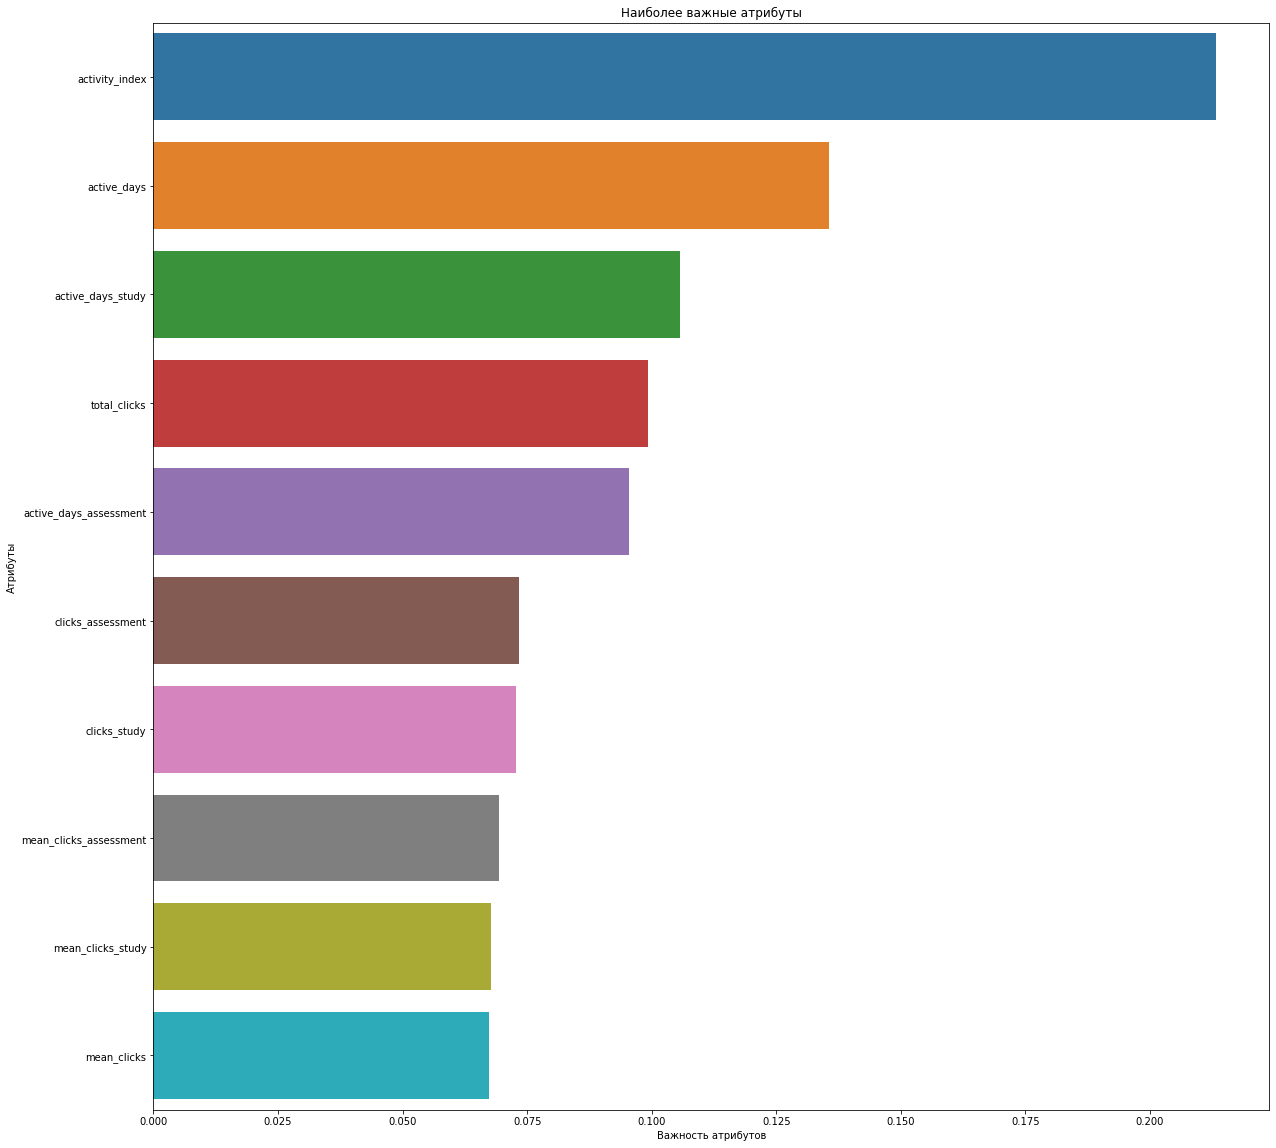

In [355]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [356]:
model.score(X_test, y_test)

0.6416593115622242

In [388]:

model_table_2=model_table.merge(students.iloc[:,[0,1,2,3,5,6,7,10]], how='left', on =['code_module','code_presentation','id_student'])

In [389]:
model_table_2.head()

,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study,final_result,gender,highest_education,imd_band,age_band,disability
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,23.35,24.00,23.26,Pass,M,HE Qualification,90-100%,55<=,N
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,17.94,21.43,17.60,Pass,F,HE Qualification,20-30%,35-55,N
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,23.42,0.00,23.42,Withdrawn,F,A Level or Equivalent,30-40%,35-55,Y
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,17.54,18.28,17.42,Pass,F,A Level or Equivalent,50-60%,35-55,N
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,14.77,12.00,14.90,Pass,F,Lower Than A Level,50-60%,0-35,N


In [390]:
cols=list(model_table_2)

In [391]:
cols.insert(18, cols.pop(cols.index('final_result')))

In [392]:
model_table_2 = model_table_2.ix[:, cols]

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [393]:
def gender(a):
    if a == 'F':
        return 1
    return 0
model_table_2.gender=model_table_2.gender.apply(gender)

In [394]:
def education(a):
    if a == 'Lower Than A Level':
        return 1
    if a == 'A Level or Equivalent':
        return 2
    if a == 'HE Qualification':
        return 3
    if a == 'Post Graduate Qualification':
        return 4
    return 0
    
model_table_2.highest_education=model_table_2.highest_education.apply(education)

In [395]:
def imd(a):
    if a == '10-20%':
        return 1
    if a == '20-30%':
        return 2
    if a == '30-40%':
        return 3
    if a == '40-50%':
        return 4
    if a == '50-60%':
        return 5
    if a == '60-70%':
        return 6
    if a == '70-80%':
        return 7
    if a == '80-90%':
        return 8
    if a == '90-100%':
        return 9
    return 0
model_table_2.imd_band=model_table_2.imd_band.apply(imd)

In [396]:
def age(a):
    if a == '0-35':
        return 0
    if a == '35-55':
        return 1
    return 2
model_table_2.age_band=model_table_2.age_band.apply(age)

In [397]:
def disability(a):
    if a == 'Y':
        return 1
    return 0
model_table_2.disability=model_table_2.disability.apply(disability)

In [398]:
model_table_dummies_2= pd.concat([model_table_2, dummies], axis =1)
model_table_dummies_2= model_table_dummies_2.drop('final_result', axis =1)
model_table_dummies_2.head()


,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,...,mean_clicks_study,gender,highest_education,imd_band,age_band,disability,Distinction,Fail,Pass,Withdrawn
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,...,23.26,0,3,9,2,0,0,0,1,0
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,...,17.60,1,3,2,1,0,0,0,1,0
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,...,23.42,1,2,3,1,1,0,0,0,1
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,...,17.42,1,2,5,1,0,0,0,1,0
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,...,14.90,1,1,5,0,0,0,0,1,0


In [399]:
Y_2= model_table_dummies_2.iloc[:,-4:]
X_2= model_table_dummies_2.iloc[:,3:-4]


In [400]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size=0.3)

In [401]:
model_2=RandomForestClassifier(n_estimators=100)

model_2.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

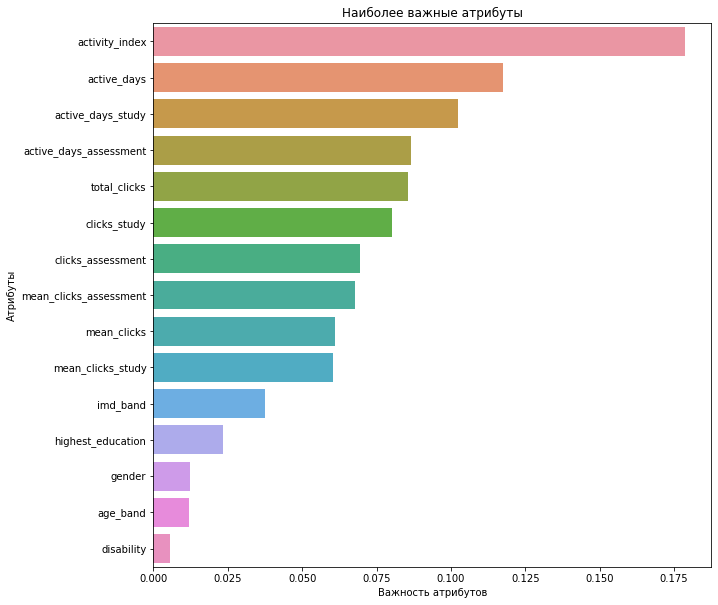

In [402]:
headers = list(X_2_train.columns.values)

feature_imp = pd.Series(model_2.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [387]:
print ('Точность предсказания модели:', round(model_2.score(X_2_test, y_2_test),2)*100,'%')

Точность предсказания модели: 63.0 %


In [194]:
VLE.activity_type.unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

In [539]:
activity_type = activity_table.merge(VLE[['id_site','activity_type']], on = 'id_site', how = 'left').merge(students[['code_module','code_presentation','id_student','final_result']], how='left', on =['code_module','code_presentation','id_student']).groupby(['code_module','final_result','activity_type']).agg({'sum_click': 'sum'}).reset_index()

In [540]:
activity_type=activity_type.merge (activity_type.groupby(['code_module','final_result']).sum().reset_index(),\
                                   on=['code_module','final_result'])
activity_type['%']=round(activity_type.sum_click_x/activity_type.sum_click_y*100,2)

In [550]:
activity_type_graph = pd.pivot_table(activity_type, values='%', index=['code_module','final_result'], \
                                columns=['activity_type'],  aggfunc=sum, fill_value=0)
activity_type_graph.loc['AAA']

activity_type,dataplus,dualpane,externalquiz,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,resource,sharedsubpage,subpage,url
final_result,,,,,,,,,,,,,,,,,
Distinction,0.32,0.0,0.0,34.19,0.15,23.92,0.03,33.18,0.0,0.0,0.0,0.0,0.0,0.83,0.0,5.00,2.39
Fail,0.34,0.0,0.0,18.63,0.08,21.77,0.09,46.70,0.0,0.0,0.0,0.0,0.0,1.47,0.0,8.51,2.42
Pass,0.29,0.0,0.0,26.00,0.03,21.18,0.03,42.65,0.0,0.0,0.0,0.0,0.0,1.18,0.0,6.18,2.46
Withdrawn,0.14,0.0,0.0,30.09,0.08,22.14,0.07,38.36,0.0,0.0,0.0,0.0,0.0,1.06,0.0,5.85,2.20


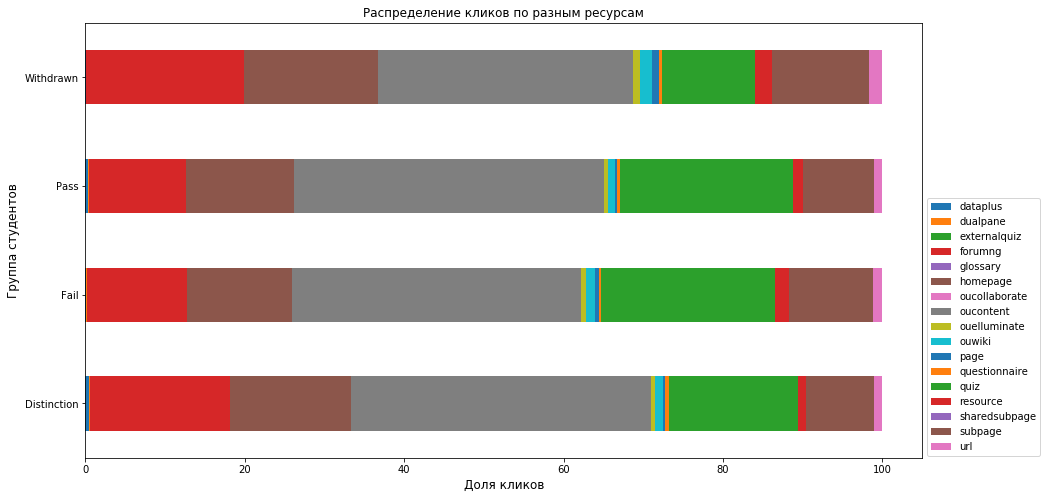

In [556]:
activity_type_graph.plot.barh(stacked=True,figsize=(15,8) )
plt.xlabel('Доля кликов', fontsize =12)
plt.ylabel('Группа студентов', fontsize =12)
plt.title('Распределение кликов по разным ресурсам')
plt.legend(bbox_to_anchor=(1, 0.61))


plt.show()

In [264]:
activity_type=activity_table.merge(VLE.iloc[:,:-2], how ='left', on =['code_module','code_presentation','id_site'])
activity_type_1=activity_type.groupby(['code_module','code_presentation','id_student','activity_type']).agg({'sum_click':'sum'}).reset_index()
activity_type_1.head()

,code_module,code_presentation,id_student,activity_type,sum_click
0,AAA,2013J,11391,forumng,193
1,AAA,2013J,11391,homepage,138
2,AAA,2013J,11391,oucontent,553
3,AAA,2013J,11391,resource,13
4,AAA,2013J,11391,subpage,32


In [267]:
activity_type_1.columns=['code_module','code_presentation','id_student','activity_type','sourses_sum_click']
activity_type_1= pd.pivot_table(activity_type_1, values=['sourses_sum_click'], index=['code_module','id_student'], \
                                columns=['activity_type'],fill_value=0)


In [268]:
activity_type_2= activity_type_1.reset_index()
activity_type_2.columns=['code_module','id_student','dataplus','dualpane','externalquiz', 'forumng', 'glossary', 'homepage', 'oucollaborate', \
'oucontent', 'ouelluminate', 'ouwiki','page', 'questionnaire','quiz','resource', 'sharedsubpage','subpage','url']


In [269]:
activity_type_2.head()

,code_module,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,resource,sharedsubpage,subpage,url
0,AAA,11391,0,0,0,193,0,138,0,553,0,0,0,0,0,13,0,32,5
1,AAA,28400,10,0,0,417,0,324,0,537,0,0,0,0,0,12,0,87,48
2,AAA,30268,0,0,0,126,0,59,0,66,0,0,0,0,0,4,0,22,4
3,AAA,31604,2,0,0,634,1,432,0,836,0,0,0,0,0,19,0,144,90
4,AAA,32885,0,0,0,194,4,204,0,494,0,0,0,0,0,45,0,79,14
